# Data Introduction:
The data used to train this model was obtained from the Large Database of English Compounds, a database assembled by Christina L. Gagne, Thomas L. Spalding, and Daniel Schmidtke consisting of over 8,000 English closed compounds and their components. 

See https://era.library.ualberta.ca/items/dc3b9033-14d0-48d7-b6fa-6398a30e61e4 for more information

Here we import the data as a dataframe, with the columns "c1" and "c2" being the first and second components of the compound respectively and the column "stim" being the compound itself.

In [ ]:
import pandas as pd
df = pd.read_csv('Ladec - Sheet1.csv',)
df

,c1,c2,stim
0,gad,about,gadabout
1,knock,about,knockabout
2,turn,about,turnabout
3,race,about,raceabout
4,walk,about,walkabout
...,...,...,...
8951,junk,yards,junkyards
8952,ship,yards,shipyards
8953,farm,yards,farmyards
8954,brick,yards,brickyards


# **Exploratory Data Analysis**

In [ ]:
import spacy
import numpy as np

Here we see that there are 8376 unique compounds in the database:

In [ ]:
print(df.nunique())

c1      2138
c2      2406
stim    8376
dtype: int64


To find that there are 3774 unique components, we find the length of the set of the list made from combining c1 and c2:

In [ ]:
L1 = df['c1'].tolist()
L2 = df['c2'].tolist()
L3 = L1 + L2
unique_components = len(set(L3))
print(unique_components)

3774


Now we will look at the most and least productive components (productive = in the most compounds) in our data set. We can use a Counter object to count how many compounds each component in.

In [ ]:
from collections import Counter
most_productive_components = [item for items, c in Counter(L3).most_common()
                                      for item in [items] * c]

res = []
[res.append(x) for x in most_productive_components if x not in res]
str(res)
print(res[:5])  #Returns 5 most productive components
print(res[-994:]) #Returns the 994 least productive components, which each only occur once

['man', 'over', 'fish', 'men', 'head']
['abundance', 'acre', 'acres', 'activity', 'actor', 'afternoon', 'age', 'agent', 'agents', 'ages', 'aid', 'aids', 'ailing', 'airmen', 'ales', 'and', 'anxiety', 'apples', 'appraisal', 'asses', 'attraction', 'aunt', 'aunts', 'aware', 'awls', 'babies', 'backer', 'backers', 'bacon', 'balm', 'bandsman', 'bangs', 'basins', 'bather', 'bathers', 'bays', 'beards', 'bearing', 'beaters', 'bedding', 'being', 'belts', 'bend', 'bender', 'berg', 'bergs', 'bid', 'bids', 'bike', 'bikes', 'billies', 'binderies', 'bindery', 'binding', 'bins', 'biter', 'biters', 'bits', 'blacks', 'bladders', 'blades', 'blading', 'blaster', 'blasters', 'blasts', 'blazer', 'blazers', 'bleed', 'bleeds', 'blend', 'blende', 'blindness', 'bloom', 'blot', 'blots', 'blowers', 'blows', 'boating', 'bodice', 'boil', 'boilers', 'boils', 'boom', 'booth', 'booths', 'bore', 'borer', 'boss', 'bottles', 'bound', 'bowman', 'boxing', 'brakes', 'brand', 'brands', 'breadths', 'breasts', 'breed', 'breeder

In [ ]:
compounds = df['stim'].tolist()
denominator = len(compounds)
blank = []

for word in compounds:
  length = len(word)
  blank.append(length)
numerator = sum(blank)
avg_length = float(numerator) / float(denominator)
print(avg_length)
#The average length of a compound word in the dataframe is about 9 letters

9.222755694506477


# **Data Preprocessing**

First, we will use an algorithm to generate each possible non one-letter split for every compound and put the splits into the list "splitted".

In [ ]:
#Algorithm

def split(string):
  x = 2
  while (x < len(string)-1):
      a = string[:x] + ' ' + string[x:]
      splitted.append(a)
      x = x+1

In [ ]:
#Splits all compounds in the dataframe and puts them into the list "splitted"
splitted = []

for word in df['stim']:
  split(word)

correctly_split = (df['c1'] + ' ' + df['c2']).tolist()

for word in correctly_split:
  if word in splitted:
    splitted.remove(word)

Then we label each split as valid (0) or invalid (1) and put them into a dataframe.

In [ ]:
#Labels each split as 0 or 1 and puts all labelled splits into the dataframe "df3"
dataframe = pd.DataFrame (splitted, columns = ['Splits'])
dataframe.insert(1, 'Validity', 0)
df1 = pd.DataFrame (correctly_split, columns = ['Splits'])
df1.insert(1, 'Validity', 1)
df2 = pd.concat([df1, dataframe], axis = 0)
df3 = df2.reset_index()
del df3['index']
df3

,Splits,Validity
0,gad about,1
1,knock about,1
2,turn about,1
3,race about,1
4,walk about,1
...,...,...
55728,bricky ards,0
55729,brickya rds,0
55730,brickyar ds,0
55731,zi gzag,0


Now we vectorize the splits in the dataframe and put their vectorized form into a list, after which we can put the vectorized forms back into a dataframe with their unvectorized counterparts.

In [ ]:
#Vectorizes all splits in df3 and puts the vectorized forms into "Vectors"
Vectors = []
nlp = spacy.load('en_core_web_sm')
for split in df3['Splits']:
  doc = nlp(split)
  Vectors.append(doc.vector)

In [ ]:
#Creates the dataframe "dfd" where splits are labelled with their vectorized forms
vectorframe = pd.DataFrame(Vectors)
dfd = pd.concat([vectorframe, df3], axis=1, join="inner")
dfd

,0,1,2,3,4,5,6,7,8,9,...,88,89,90,91,92,93,94,95,Splits,Validity
0,0.495227,1.251182,2.025891,-0.311441,-1.436702,0.579851,0.002586,-0.276636,0.865848,0.643971,...,-0.123213,-0.558706,-0.814044,0.145319,-0.061474,0.351872,0.451889,-0.223467,gad about,1
1,0.430599,0.942603,1.597756,-0.273998,-0.948710,0.325434,-0.079493,-0.174435,0.539130,1.455407,...,-0.287082,-0.035809,-0.409452,0.057734,0.029986,-0.220578,0.166293,-0.610765,knock about,1
2,0.582242,0.808537,1.552818,0.021447,-1.438601,-0.183807,0.239319,-0.631931,0.974143,1.047185,...,0.582082,-0.203121,-0.725526,0.400700,-0.352184,-0.235440,0.411653,-0.635350,turn about,1
3,0.902210,0.037001,1.408635,0.045170,-1.197799,0.254348,0.829496,-0.618311,0.505440,0.309836,...,-0.298793,-0.341392,-0.132558,-0.294195,0.389238,0.192641,0.453822,-0.725066,race about,1
4,0.326254,0.543351,1.263787,-0.281351,-0.966011,0.311930,0.019296,-0.692937,0.780033,0.615608,...,-0.432454,0.154576,-0.865562,-0.632083,-0.181909,0.040150,0.377143,-0.651488,walk about,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55728,0.936775,0.530218,-0.134502,-0.062314,-1.461692,0.756367,0.084495,0.834164,0.525668,-0.405846,...,-0.415788,-0.076664,-0.181679,-0.084830,-0.062973,1.402637,1.136612,-0.427667,bricky ards,0
55729,0.800481,0.035096,0.804107,-0.262561,-0.280078,1.183102,0.126407,-0.321270,1.056598,-0.201523,...,-0.766310,-0.101836,-0.660241,-0.642176,-0.169593,1.598005,-0.452147,0.323138,brickya rds,0
55730,0.939690,0.291240,0.741698,-1.003747,-0.175657,0.643417,-0.313476,-0.411704,-0.086087,-0.696954,...,-0.815340,-0.097561,-0.435341,-0.889350,0.594332,1.156121,0.316203,0.906124,brickyar ds,0
55731,0.336009,0.158422,0.219018,-0.525613,0.338559,0.218237,-0.199385,-0.056574,0.196192,0.020461,...,-0.168611,-0.165369,-0.445056,-1.150315,0.528524,1.537833,0.644822,0.063187,zi gzag,0


# Model Training

First we split the data into training, validation, and test sets.

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split

In [ ]:
#Splits dfd into training, validation, and test sets
train, x = train_test_split(dfd, test_size = .2, random_state = 16)
validation, test = train_test_split(x, test_size = .5, random_state = 16)

Then we create the model.

In [ ]:
import tensorflow as tf
from tensorflow import keras
import random
random.seed(345)

In [ ]:
#The neural network architecture:
model = keras.Sequential([
    keras.layers.Dense(32, input_shape = (96,), activation = 'relu'),
    keras.layers.Dropout(.2),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dropout(.2),
    keras.layers.Dense(32, activation = 'relu'),
    keras.layers.Dropout(.2),
    keras.layers.Dense(16, activation = 'relu'),
    keras.layers.Dropout(.2),
    keras.layers.Dense(2, activation = 'sigmoid')])
model.compile(optimizer = 'adam',
              loss = keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ['accuracy'])


Then we train the model on the data.

In [ ]:
x_train = train.iloc[:, 0:96].values
y_train = train.Validity.values
x_validation = validation.iloc[:, 0:96].values
y_validation = validation.Validity.values
x_test = test.iloc[:, 0:96].values
y_test = test.Validity.values

In [ ]:
#Fits the model on training data
model.fit(x_train, y_train, batch_size = 1024, verbose = 0, epochs = 30)

In [ ]:
#Prints the accuracy of model on training data
print(model.evaluate(x_train, y_train))

1394/1394 [==============================] - 2s 1ms/step - loss: 0.2158 - accuracy: 0.9141
[0.21579159796237946, 0.914143443107605]


In [ ]:
#Prints the accuracy of model on validation data
print(model.evaluate(x_validation, y_validation))

175/175 [==============================] - 0s 1ms/step - loss: 0.2650 - accuracy: 0.8875
[0.26502200961112976, 0.8874932527542114]


In [ ]:
#Prints the accuracy of model on test data
print(model.evaluate(x_test, y_test))

175/175 [==============================] - 0s 1ms/step - loss: 0.2415 - accuracy: 0.8983
[0.24145229160785675, 0.8982776999473572]


Now we can create confusion matrices of the results:

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
#Creates confusion matrix for results on training data and prints accuracy, sensitivity, and specitivity
train_pred = model.predict(x_train).argmax(axis = 1)

cm = confusion_matrix(y_train,train_pred)
print(cm)
plt.imshow(cm, cmap='binary')

total=sum(sum(cm))

accuracy=(cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

specificity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Specificity : ', specificity )

sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Sensitivity : ', sensitivity)

In [ ]:
#Creates confusion matrix for results on validation data and prints accuracy, sensitivity, and specitivity
validation_pred = model.predict(x_validation).argmax(axis = 1)

cm = confusion_matrix(y_validation,validation_pred)
print(cm)
plt.imshow(cm, cmap='binary')

total=sum(sum(cm))

accuracy=(cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

specificity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Specificity : ', specificity )

sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Sensitivity : ', sensitivity)

[[4481  228]
 [ 339  526]]
Accuracy :  0.8982777179763186
Sensitivity :  0.9515820768740709
Specificity :  0.608092485549133


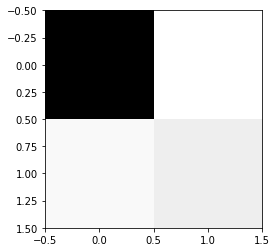

In [ ]:
#Creates confusion matrix for results on test data and prints accuracy, sensitivity, and specitivity
p_pred = model.predict(x_test).argmax(axis = 1)

cm = confusion_matrix(y_test,p_pred)
print(cm)
plt.imshow(cm, cmap='binary')

total=sum(sum(cm))

accuracy=(cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

In [ ]:
#Creates a function to make confusion matrices. obtained from https://github.com/DTrimarchi10/confusion_matrix
import seaborn as sns
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

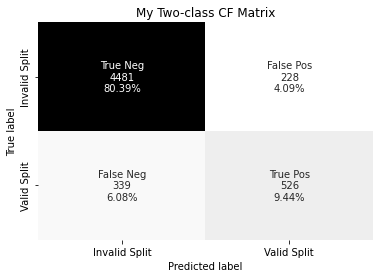

In [ ]:

labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Invalid Split', 'Valid Split']
make_confusion_matrix(cm, group_names=labels, categories=categories, cbar = False, sum_stats = False, cmap='binary', title='My Two-class CF Matrix')

# Operationalizing the Model

Here I create a function which takes an input as a string (most likely a compound) and outputs what the neural network predicts to be the most likely split.

In [ ]:
#The function takes a compound, splits it into all non-one-letter splits, then uses the neural network to predict the probability that the split is correct.
#Then it prints out the split with the highest probability of being correct.
def split_compound(string):
  values = []
  nlp = spacy.load('en_core_web_sm')
  splitted_word = []
  x = 2
  while (x < len(string)-1):
    a = string[:x] + ' ' + string[x:]
    splitted_word.append(a)
    x = x+1
  for split in splitted_word:
    doc = nlp(split)
    values.append(model.predict(np.reshape(doc.vector, (1,96)), verbose = 0)[0][1])
  for split in splitted_word:
    doc = nlp(split)
    if max(values) == model.predict(np.reshape(doc.vector, (1,96)), verbose = 0)[0][1]:
      print(split)

Here we test a dictionary-based compound splitter, obtained here:https://pypi.org/project/compound-word-splitter/ . However, the splitter only splits words that aren't recognized by pyenchant (spell checker).

In [ ]:
pip install compound-word-splitter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install pyenchant

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 2.9 MB/s 


In [ ]:
pip install wheel

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!apt update
!apt install enchant --fix-missing
!apt install -qq enchant
!pip install pyenchant

In [ ]:
import splitter

Here we test the dictionary-based splitter on 20 words from the LaDEC

In [ ]:
print(splitter.split('wraparound'))
print(splitter.split('counterattraction'))
print(splitter.split('poleaxe'))
print(splitter.split('pallbearer'))
print(splitter.split('featherbed'))
print(splitter.split('elderberry'))
print(splitter.split('countercultures'))
print(splitter.split('firedrake'))
print(splitter.split('headdress'))
print(splitter.split('overestimate'))
print(splitter.split('breakfasts'))
print(splitter.split('straightjacket'))
print(splitter.split('heathland'))
print(splitter.split('searchlights'))
print(splitter.split('landlubber'))
print(splitter.split('cabinetmaker'))
print(splitter.split('toolmakers'))
print(splitter.split('birthmarks'))
print(splitter.split('overmuchness'))
print(splitter.split('merestone'))


['wraparound']
['counter', 'attraction']
['poleaxe']
['pallbearer']
['feather', 'bed']
['elderberry']
['countercultures']
['fired', 'rake']
['headdress']
['overestimate']
['breakfasts']
['straight', 'jacket']
['heath', 'land']
['searchlights']
['landlubber']
['cabinetmaker']
['toolmakers']
['birthmarks']
['overmuch', 'Ne', 's']
['merest', 'one']


As you can see, for the compounds "firedrake" and "merestone", the splitter does return splits that are words in English, however they are not the correct split of the compound. For "overmuchness", I have no idea what happened. The rest of the words were either correctly split or recognized by the spell checker and thus not split.

In [ ]:
split_compound('wraparound')
split_compound('counterattraction')
split_compound('poleaxe')
split_compound('pallbearer')
split_compound('featherbed')
split_compound('elderberry')
split_compound('countercultures')
split_compound('firedrake')
split_compound('headdress')
split_compound('overestimate')
split_compound('breakfasts')
split_compound('straightjacket')
split_compound('heathland')
split_compound('searchlights')
split_compound('landlubber')
split_compound('cabinetmaker')
split_compound('toolmakers')
split_compound('birthmarks')
split_compound('overmuchness')
split_compound('merestone')

wrap around
counterattr action
pole axe
pall bearer
feat herbed
elder berry
count ercultures
fire drake
head dress
over estimate
break fasts
straightjac ket
heat hland
sea rchlights
land lubber
cabinet maker
tool makers
birth marks
over muchness
mere stone


As you can see, the dictionary-free model is 70% accurate in splitting the above compounds.

Now, we test the dictionary-based model on a misspelled word:

In [ ]:
print(splitter.split('sfeatherbed'))
print(splitter.split('fseatherbed'))
print(splitter.split('feastherbed'))
print(splitter.split('featsherbed'))
print(splitter.split('feathserbed'))
print(splitter.split('feathesrbed'))
print(splitter.split('featherbsed'))
print(splitter.split('featherbesd'))
print(splitter.split('fetherbed'))
print(splitter.split('feaherbed'))
print(splitter.split('featerbed'))
print(splitter.split('feathebed'))

['sf', 'eat', 'herb', 'ed']

['feast', 'herb', 'ed']
['feats', 'herb', 'ed']

['feat', 'hes', 'Rb', 'ed']
['feat', 'herbs', 'ed']
['feather', 'be', 'd']
['Fe', 'the', 'Rb', 'ed']
['Fe', 'ah', 'er', 'bed']
['feat', 'er', 'bed']
['feat', 'Hebe', 'd']


The dictionary-based model is completely unable to account for a compound with a letter randomly inserted or removed.

In [ ]:
split_compound('sfeatherbed')
split_compound('fseatherbed')
split_compound('feastherbed')
split_compound('featsherbed')
split_compound('feathserbed')
split_compound('feathesrbed')
split_compound('featherbsed')
split_compound('featherbesd')
split_compound('fetherbed')
split_compound('feaherbed')
split_compound('featerbed')
split_compound('feathebed')

sfea therbed
fseath erbed
feast herbed
feat sherbed
feat hserbed
feath esrbed
feath erbsed
feath erbesd
fet herbed
feahe rbed
featerb ed
feath ebed


While none of the above splits, except for "feast herbed", are acceptable splits, the model is at least able  to make a reasonable guess as to what the split is, while the dictionary-based model seems to generate totally random splits.